In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Acer/Downloads/creditcard.csv")
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(df["Class"].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [6]:
X_xgb = df.drop(['Class', 'Time', 'Amount'], axis=1)
y_xgb = df['Class']

In [7]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X_xgb, y_xgb, test_size = 0.1, random_state = 42, stratify=y_xgb)
model1 = xgb.XGBClassifier(max_depth=5, scale_pos_weight=100)
model1.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [8]:
y_pred_xgb = model1.predict(X_test_xgb)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
from sklearn.metrics import confusion_matrix
conf_matrix_xgb = confusion_matrix(y_test_xgb, y_pred_xgb)
conf_matrix_xgb

array([[28429,     3],
       [    6,    43]], dtype=int64)

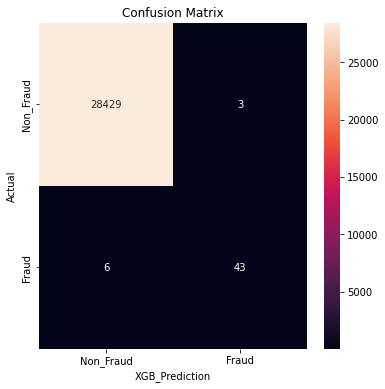

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ['Non_Fraud', 'Fraud']
plt.figure(figsize = (6,6))
sns.heatmap(conf_matrix_xgb, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('XGB_Prediction')
plt.ylabel('Actual')
plt.show()

In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
import matplotlib.pyplot as plt

# Get probability scores for class 1 (Fraud)
y_scores_xgb = model1.predict_proba(X_test_xgb)[:, 1]

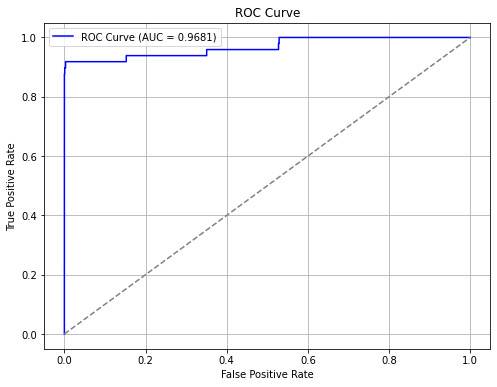

In [12]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_xgb, y_scores_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random model line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

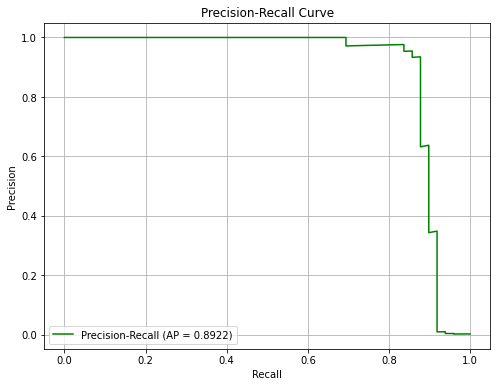

In [13]:
# Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test_xgb, y_scores_xgb)
average_precision = average_precision_score(y_test_xgb, y_scores_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {average_precision:.4f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()